In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import b3d
import sys

sys.path.append(b3d.get_root_path())

In [3]:
import jax.numpy as jnp
import rerun as rr

In [4]:
from tests.dense_model_unit_tests.triangle_depth_posterior.task import (
    TrianglePosteriorGridApproximationTask,
)
from tests.dense_model_unit_tests.triangle_depth_posterior.solver.importance import (
    ImportanceSolver,
)

/home/georgematheos/b3d/tests/dense_model_unit_tests/triangle_depth_posterior/solver/importance.py:46: SyntaxWarning: invalid escape sequence '\i'
  """


In [5]:
task_specs = [
    (background_color, triangle_color)
    for background_color in [jnp.array([1.0, 1.0, 1.0]), jnp.array([0.0, 0.0, 0.0])]
    for triangle_color in [jnp.array([1.0, 0.0, 0.0]), jnp.array([0.0, 1.0, 0.0])]
]

In [6]:
task = TrianglePosteriorGridApproximationTask.default_scene_using_colors(*task_specs[0])

In [25]:
rr.init("triangle_posterior_test-2")
rr.connect("127.0.0.1:8812")
task.visualize_task()

In [29]:
solver = ImportanceSolver()
task_spec = task.get_task_specification()
solution = solver.solve(task_spec)

/home/georgematheos/b3d/tests/dense_model_unit_tests/triangle_depth_posterior/solver/importance.py:46: SyntaxWarning: invalid escape sequence '\i'
  """


In [30]:
metrics = task.score(solution)
metrics

{'mass_assigned_outside_expected_region': <jax.Array(2.546743e-05, dtype=float32)>,
 'divergence_from_uniform_in_expected_region': <jax.Array(inf, dtype=float32)>,
 'log_posterior_approximation': <jax.Array float32(99,) ≈-4.4e+02 ±5.7e+02 [≥-1.9e+03, ≤0.0] zero:1 nonzero:98
   <Arrayviz rendering>
 >,
 'expected_log_posterior': <jax.Array float32(99,) ≈-4.2 ±0.0 [≥-inf, ≤-4.2] nonzero:99 -inf:29
   <Arrayviz rendering>
 >}

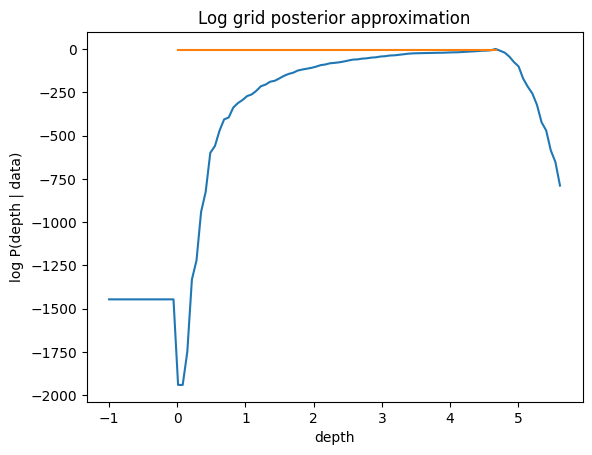

In [31]:
task.visualize_solution(solution, metrics)

In [11]:
solver.visualize_solver_state()